# Quickstart

Learn how to use IterGP with this basic tutorial.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='svg'

## Dataset

You can load datasets directly via the API.

In [2]:
from probnum import backend

from itergp import datasets

# Generate data
rng_state = backend.random.rng_state(42)

num_data = 10
input_shape = ()
output_shape = ()

rng_state, rng_state_data = backend.random.split(rng_state, num=2)
data = datasets.SyntheticDataset(
    rng_state=rng_state,
    size=(num_data, num_data),
    input_shape=input_shape,
    output_shape=output_shape,
    noise_var=0.1,
)
X = data.train.X
y = data.train.y

## Gaussian Process Model

Let's define a simple Gaussian process model $GP(\mu, k)$ with a Matern kernel.

In [11]:
from probnum import linops, randvars
from probnum.randprocs import kernels, mean_fns

from itergp import GaussianProcess

# Model
mean_fn = mean_fns.Zero(input_shape=input_shape, output_shape=output_shape)
kernel = kernels.Matern(input_shape=input_shape, nu=2.5, lengthscale=0.15)
gp = GaussianProcess(mean_fn, kernel)

# Likelihood
sigma_sq = 0.1
noise = randvars.Normal(
    mean=backend.zeros(y.shape),
    cov=linops.Scaling(sigma_sq, shape=(num_data, num_data)),
)

## Approximation Method

Next, we choose the variant of IterGP we want to use.

In [12]:
from itergp import methods

itergp_cg = methods.CG(maxiter=4)

## Prediction

Finally, we can condition our prior on the data using the approximation method we selected.

In [13]:
gp_post = gp.condition_on_data(X, y, b=noise, approx_method=itergp_cg)

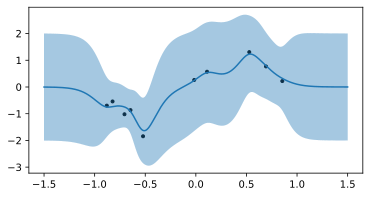

In [14]:
Xnew = backend.linspace(-1.5, 1.5, 1000)
fig, ax = plt.subplots(figsize=(6, 3))
gp_post.plot(Xnew, data=(X, y), ax=ax)
plt.show()